<a href="https://colab.research.google.com/github/9C0c0/H-C-M-Y-X-L-NH/blob/main/ThithuXLA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import files
uploaded = files.upload()


Saving quang_ninh.jpg to quang_ninh.jpg


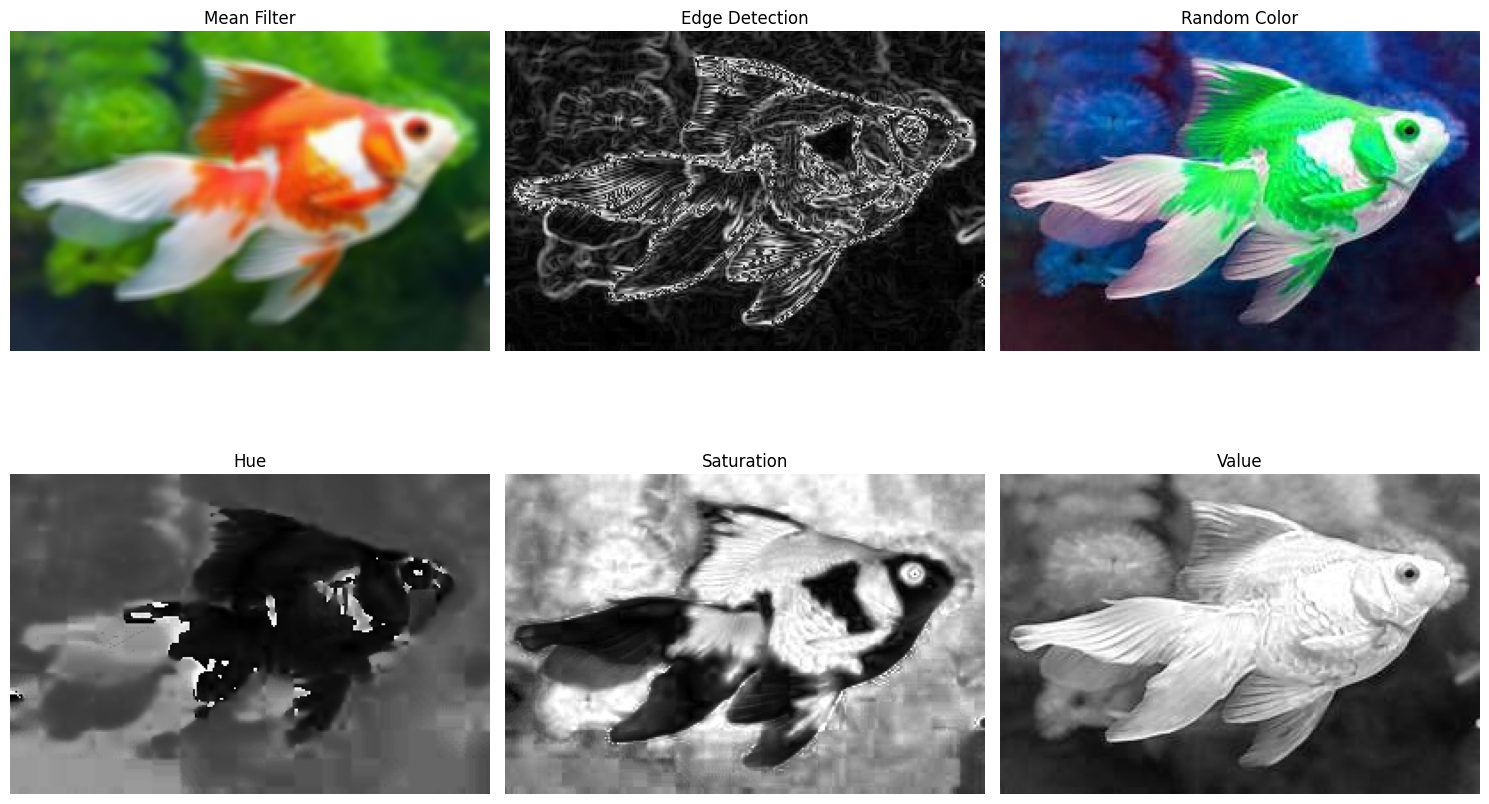

In [3]:
import cv2
import numpy as np
import random
from matplotlib import pyplot as plt

img = cv2.imread('a.jpg')
mean_filtered = cv2.blur(img, (5, 5))
cv2.imwrite('a_mean_filter.jpg', mean_filtered)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
edges = cv2.magnitude(sobelx, sobely)
edges = np.uint8(edges)
cv2.imwrite('a_edge.jpg', edges)
channels = [0, 1, 2]
random.shuffle(channels)
random_color_img = img[:, :, channels]
cv2.imwrite('a_random_color.jpg', random_color_img)

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)
cv2.imwrite('a_hue.jpg', h)
cv2.imwrite('a_saturation.jpg', s)
cv2.imwrite('a_value.jpg', v)

titles = ['Mean Filter', 'Edge Detection', 'Random Color', 'Hue', 'Saturation', 'Value']
images = [mean_filtered, edges, random_color_img, h, s, v]
cmaps = [None, 'gray', None, 'gray', 'gray', 'gray']

plt.figure(figsize=(15,10))
for i in range(6):
    plt.subplot(2, 3, i+1)
    if cmaps[i]:
        plt.imshow(images[i], cmap=cmaps[i])
    else:
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [10]:
import cv2
import numpy as np
import random
import os

# ======= Đọc 3 ảnh gốc ========
image_files = ['image1.jpg', 'image2.jpg', 'image3.jpg']
images = []

for file in image_files:
    img = cv2.imread(file)
    if img is None:
        print(f" Không tìm thấy ảnh: {file}")
        exit()
    images.append(img)

# ======= Các hàm biến đổi ảnh ========

def inverse_image(img):
    return 255 - img

def gamma_correction(img, gamma):
    invGamma = 1.0 / gamma
    table = np.array([(i / 255.0) ** invGamma * 255 for i in range(256)]).astype("uint8")
    return cv2.LUT(img, table)

def log_transform(img, c):
    img_float = img.astype(np.float32)
    log_img = c * np.log1p(img_float)
    log_img = np.clip(log_img, 0, 255).astype(np.uint8)
    return log_img

def histogram_equalization(img):
    img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
    img_yuv[:, :, 0] = cv2.equalizeHist(img_yuv[:, :, 0])
    return cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

def contrast_stretching(img, min_val, max_val):
    img_float = img.astype(np.float32)
    stretched = (img_float - min_val) * (255.0 / (max_val - min_val))
    stretched = np.clip(stretched, 0, 255).astype(np.uint8)
    return stretched

def adaptive_hist_equalization(img):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    lab[:, :, 0] = clahe.apply(lab[:, :, 0])
    return cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

# ======= Áp dụng và lưu kết quả cho từng ảnh ========
def apply_and_save(transform_name, transform_func):
    for i, img in enumerate(images):
        result = transform_func(img)
        filename = f"output_{transform_name.lower()}_{i+1}.jpg"
        cv2.imwrite(filename, result)
        print(f" Đã lưu: {filename}")

# ======= Menu điều khiển =========
print("\n MENU: Nhấn phím sau để chọn biến đổi")
print(" I - Image inverse transformation")
print(" G - Gamma Correction (0.5 - 2.0)")
print(" L - Log Transformation (c = 1.0 - 5.0)")
print(" H - Histogram Equalization")
print(" C - Contrast Stretching (min, max từ 0-255)")
print(" A - Adaptive Histogram Equalization (CLAHE)\n")

while True:
    key = input(" Nhấn phím (I/G/L/H/C/A), hoặc Q để thoát: ").strip().upper()

    if key == 'Q':
        print(" Kết thúc chương trình.")
        break
    elif key == 'I':
        apply_and_save("inverse", inverse_image)
    elif key == 'G':
        gamma = round(random.uniform(0.5, 2.0), 2)
        print(f" Gamma sử dụng: {gamma}")
        apply_and_save("gamma", lambda img: gamma_correction(img, gamma))
    elif key == 'L':
        c = round(random.uniform(1.0, 5.0), 2)
        print(f" Hệ số log c sử dụng: {c}")
        apply_and_save("log", lambda img: log_transform(img, c))
    elif key == 'H':
        apply_and_save("hist", histogram_equalization)
    elif key == 'C':
        min_val = random.randint(0, 100)
        max_val = random.randint(155, 255)
        print(f" Stretching từ {min_val} đến {max_val}")
        apply_and_save("contrast", lambda img: contrast_stretching(img, min_val, max_val))
    elif key == 'A':
        apply_and_save("clahe", adaptive_hist_equalization)
    else:
        print(" Phím không hợp lệ. Vui lòng thử lại.")



 MENU: Nhấn phím sau để chọn biến đổi
 I - Image inverse transformation
 G - Gamma Correction (0.5 - 2.0)
 L - Log Transformation (c = 1.0 - 5.0)
 H - Histogram Equalization
 C - Contrast Stretching (min, max từ 0-255)
 A - Adaptive Histogram Equalization (CLAHE)

 Nhấn phím (I/G/L/H/C/A), hoặc Q để thoát: I
 Đã lưu: output_inverse_1.jpg
 Đã lưu: output_inverse_2.jpg
 Đã lưu: output_inverse_3.jpg
 Nhấn phím (I/G/L/H/C/A), hoặc Q để thoát: i
 Đã lưu: output_inverse_1.jpg
 Đã lưu: output_inverse_2.jpg
 Đã lưu: output_inverse_3.jpg
 Nhấn phím (I/G/L/H/C/A), hoặc Q để thoát: a
 Đã lưu: output_clahe_1.jpg
 Đã lưu: output_clahe_2.jpg
 Đã lưu: output_clahe_3.jpg
 Nhấn phím (I/G/L/H/C/A), hoặc Q để thoát: q
 Kết thúc chương trình.


In [14]:
import cv2
import numpy as np

img1 = cv2.imread("colorful-ripe-tropical-fruits.jpg")
if img1 is None:
    print("Không tìm thấy ảnh colorful-ripe-tropical-fruits.jpg")
else:
    h1, w1 = img1.shape[:2]
    resized_img1 = cv2.resize(img1, (w1 + 30, h1 + 30))
    cv2.imwrite("output_fruits_resized.jpg", resized_img1)
    print("Đã lưu: output_fruits_resized.jpg")

img2 = cv2.imread("quang_ninh.jpg")
if img2 is None:
    print("Không tìm thấy ảnh quang-ninh.jpg")
else:
    h2, w2 = img2.shape[:2]
    center = (w2 // 2, h2 // 2)
    M = cv2.getRotationMatrix2D(center, -45, 1.0)
    rotated_img2 = cv2.warpAffine(img2, M, (w2, h2))
    flipped_img2 = cv2.flip(rotated_img2, 1)
    cv2.imwrite("output_quangninh_rotated_flipped.jpg", flipped_img2)
    print("Đã lưu: output_quangninh_rotated_flipped.jpg")

img3 = cv2.imread("pagoda.jpg")
if img3 is None:
    print("Khong tìm thấy ảnh pagoda.jpg")
else:
    scaled_img3 = cv2.resize(img3, None, fx=5, fy=5, interpolation=cv2.INTER_LINEAR)
    blurred_img3 = cv2.GaussianBlur(scaled_img3, (7, 7), 0)
    cv2.imwrite("output_pagoda_scaled_blurred.jpg", blurred_img3)
    print("Đã lưu: output_pagoda_scaled_blurred.jpg")

    alpha = np.random.uniform(0.5, 2.0)   # Hệ số tương phản
    beta = np.random.randint(-50, 51)     # Độ lệch sáng
    print(f"Áp dụng alpha = {alpha:.2f}, beta = {beta}")

    adjusted_img = cv2.convertScaleAbs(blurred_img3, alpha=alpha, beta=beta)
    cv2.imwrite("output_pagoda_contrast_brightness.jpg", adjusted_img)
    print("Đã lưu: output_pagoda_contrast_brightness.jpg")


Đã lưu: output_fruits_resized.jpg
Đã lưu: output_quangninh_rotated_flipped.jpg
Đã lưu: output_pagoda_scaled_blurred.jpg
Áp dụng alpha = 1.19, beta = 4
Đã lưu: output_pagoda_contrast_brightness.jpg
